In [66]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# PART-1

In [26]:
data = {
    "movie" : ["Terminator", "Die Hard", "Delta force", "Terminator",
              "Die Hard", "Terminator", "Delta force","Die Hard"],
    "rating": [9, 6.5, 8.9, 7, 7.8, 5, 8.3, 8]
}
df = pd.DataFrame(data)
df

,movie,rating
0,Terminator,9.0
1,Die Hard,6.5
2,Delta force,8.9
3,Terminator,7.0
4,Die Hard,7.8
5,Terminator,5.0
6,Delta force,8.3
7,Die Hard,8.0


In [27]:
mean = np.mean(df.rating)
median = np.median(df.rating)
mode = df.rating.mode().values[0]

In [28]:
print("ratings Mean: ",mean)
print("\nmean: ", median)

ratings Mean:  7.5625

mean:  7.9


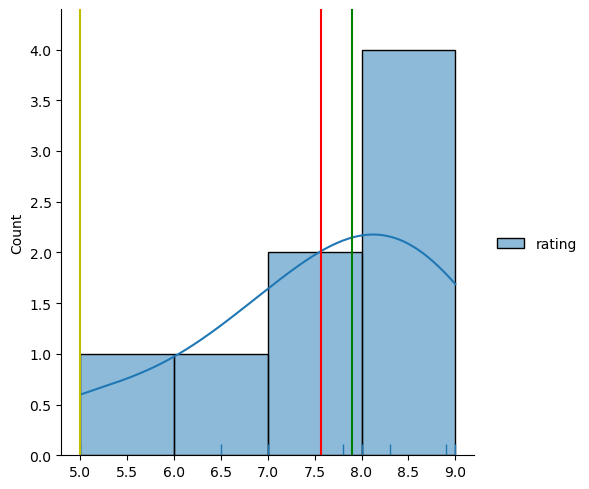

In [29]:
sns.displot(df, kde = True, rug = True)
plt.axvline(mean, color="r", linestyle="-")
plt.axvline(median, color="g", linestyle="-")
plt.axvline(mode, color="y", linestyle="-")

[Text(0.5, 0, '')]

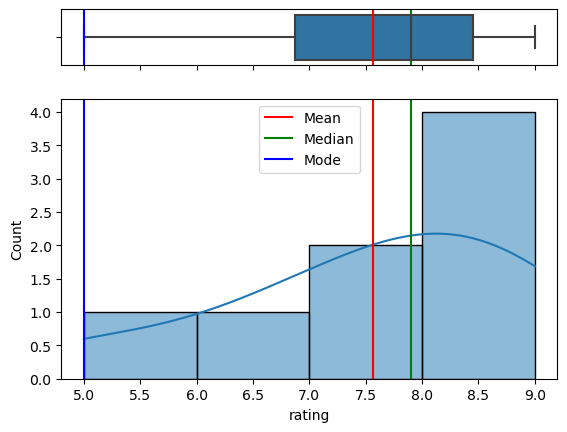

In [30]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
                                  gridspec_kw={"height_ratios": (.2, 1)})

sns.boxplot(data=df, x="rating", ax=ax_box)
ax_box.axvline(mean, color="r", linestyle="-")
ax_box.axvline(median, color="g", linestyle="-")
ax_box.axvline(mode, color="b", linestyle="-")

sns.histplot(data = df, x = "rating", ax = ax_hist, kde = True)
ax_hist.axvline(mean, color = "r", linestyle = "-", label = "Mean")
ax_hist.axvline(median, color = "g", linestyle = "-", label = "Median")
ax_hist.axvline(mode, color = "b", linestyle = "-", label = "Mode")

ax_hist.legend()
ax_box.set(xlabel="")


In [31]:
print("Variance: ", df.rating.var())
print("Stadard devition: ", df.rating.std())


Variance:  1.8083928571428576
Stadard devition:  1.3447649821224739


In [32]:
new_mean = df.groupby(["movie"])["rating"].mean()
new_std = df.groupby(["movie"])["rating"].std()
new_mean

movie
Delta force    8.600000
Die Hard       7.433333
Terminator     7.000000
Name: rating, dtype: float64

In [33]:
new_std

movie
Delta force    0.424264
Die Hard       0.814453
Terminator     2.000000
Name: rating, dtype: float64

<AxesSubplot: xlabel='movie'>

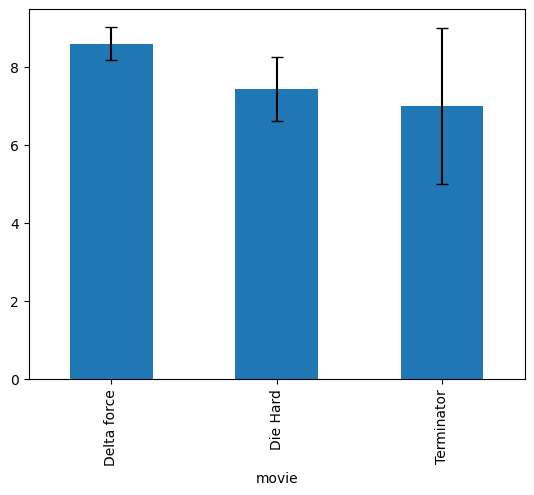

In [44]:
fig, ax = plt.subplots()
new_mean.plot.bar(yerr=new_std, ax=ax, capsize=4)

# Part-2

## Notion de population et d'echantillon

In [67]:
data = range(20)
df1 = pd.DataFrame(data)
df1.sample(5)

,0
10,10
8,8
9,9
6,6
3,3


In [68]:
print("10 sample: ", df1.sample(10).mean())
print("5 sample: ", df1.sample(5).mean())



10 sample:  0    9.3
dtype: float64
5 sample:  0    7.6
dtype: float64


In [52]:
df1.mean()

0    9.5
dtype: float64

la moyenne d'un ecantillon doit etre approximativement egale 
a celle de la popolation ou avoisinant , si l'ecart est tres grand
alors il est possible qu'il ait erreur

In [69]:
from scipy import stats
# standard error
stats.sem(df1)

array([1.32287566])

In [ ]:
# notion de quantiles, quartile, inter-quartile, 
# interval inter quartile

In [70]:
df2 = sns.load_dataset("tips")
sns.set_theme(style="whitegrid")
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


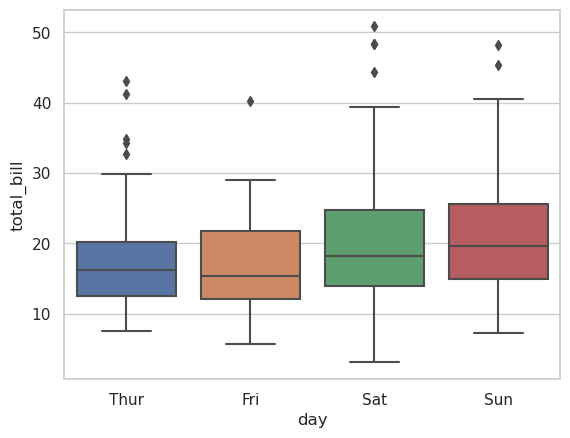

In [71]:
ax = sns.boxplot(x="day", y="total_bill", data=df2)


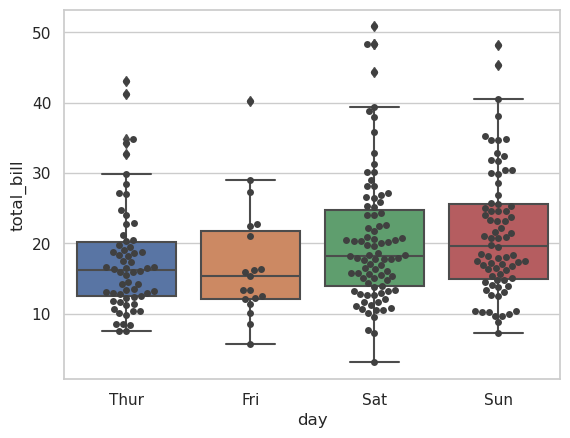

In [72]:
#  how athe vallue are scattred
ax = sns.boxplot(x="day", y="total_bill", data=df2)
ax = sns.swarmplot(x="day", y="total_bill", data=df2, color = ".25")


In [73]:
# another way to check the quartil
print(df2["total_bill"].quantile([.05, .25, .5, .75]))


0.05     9.5575
0.25    13.3475
0.50    17.7950
0.75    24.1275
Name: total_bill, dtype: float64


In [74]:
df2["total_bill"].quantile(.75) - df2["total_bill"].quantile(.25)


10.779999999999998

# Part-3
## notion de correlations et de covariance

In [75]:
iris_df = sns.load_dataset("iris")
iris_df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
20,5.4,3.4,1.7,0.2,setosa
61,5.9,3.0,4.2,1.5,versicolor
11,4.8,3.4,1.6,0.2,setosa
79,5.7,2.6,3.5,1.0,versicolor
109,7.2,3.6,6.1,2.5,virginica


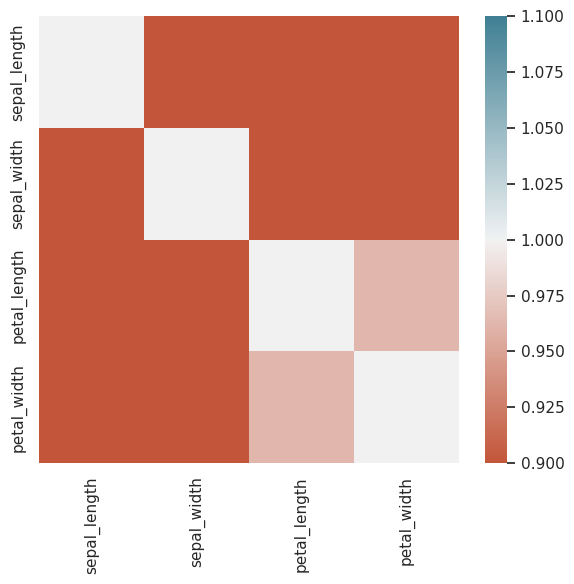

In [84]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.heatmap(iris_df.corr(), vmin = 1, vmax = 1,
                cmap = sns.diverging_palette(20, 220, as_cmap = True), ax=ax)

plt.tight_layout()
plt.show()

Covariance and correlation both measure the relationship between two variables, but covariance shows the direction and scale in their original units, while correlation shows the strength and direction on a standardized scale of -1 to +1. Correlation is essentially a normalized version of covariance, meaning it removes the scale and units to provide a unitless measure of the linear relationship's strength. 
Covariance

    What it is: A measure of how two variables change together.
    Scale: Can range from negative to positive infinity and is measured in the "product of the units" of the two variables (e.g., inches * pounds).
    What it tells you: The direction of the relationship.
        Positive: When one variable increases, the other tends to increase.
        Negative: When one variable increases, the other tends to decrease.
    Limitation: The value is heavily affected by the scale of the variables. For example, the covariance of two variables measured in dollars will be very different from the covariance of the same variables measured in cents. 

Correlation

    What it is: A scaled version of covariance that measures the strength and direction of a linear relationship.
    Scale: Always ranges from -1 to +1.
    What it tells you: Both the direction and the strength of the relationship.
        +1: Perfect positive linear relationship.
        -1: Perfect negative linear relationship.
        0: No linear relationship.
    Benefit: It is a unitless and standardized measure, making it easy to compare the strength of relationships across different datasets

In [87]:
a = [11, 12, 22, 11]
b = [ 7,  8,  9, 10]
c = [10, 11, 22, 23]

arr = np.array([a, b, c])
arr

array([[11, 12, 22, 11],
       [ 7,  8,  9, 10],
       [10, 11, 22, 23]])

In [89]:
cov_matrice = np.cov(arr, bias = True)
cov_matrice

array([[21.5 ,  1.25, 13.75],
       [ 1.25,  1.25,  6.25],
       [13.75,  6.25, 36.25]])

<AxesSubplot: >

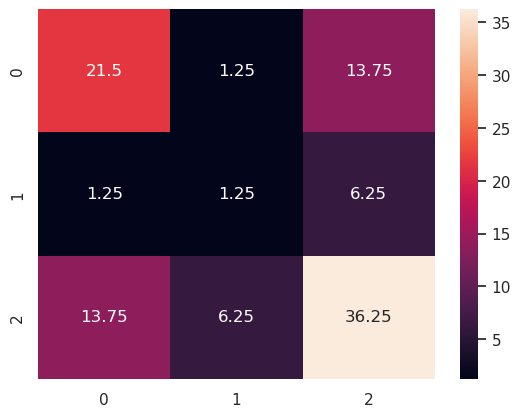

In [90]:
sns.heatmap(cov_matrice, annot = True, fmt = "g")

# Part-4

## notion de: 